# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.metrics import silhouette_score

## Load the Data

In [119]:
df = pd.read_csv('Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [120]:
df.duplicated().sum()

43

In [121]:
df.drop_duplicates(inplace = True)

In [122]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,51957.000000,5.195700e+04,51957.000000,51957.000000,51957.000000,51635.000000,51957.000000,50916.000000,51957.000000,51957.000000,51957.000000,51957.000000,51957.000000,51957.000000,51957.000000,51869.000000,51957.000000
mean,440301.908732,2.997873e+05,-1.426935,52.586011,30.420675,2.837126,1.834248,1.354741,4.130531,349.740786,4.080605,997.082453,39.152280,2.672441,383.855592,1.359521,2009.399619
std,95122.549813,1.613581e+05,1.398435,1.453008,25.544462,0.402625,0.727877,0.855328,1.926296,259.489618,1.428098,1806.325567,14.214414,3.205267,1303.677163,0.479905,3.007291
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375572.000000,1.780100e+05,-2.365778,51.487627,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440990.000000,2.669800e+05,-1.390836,52.293412,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.000000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.980800e+05,-0.214421,53.477266,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,717.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [123]:
df.shape

(51957, 26)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51957 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        51957 non-null  float64
 1   Location_Northing_OSGR                       51957 non-null  float64
 2   Longitude                                    51957 non-null  float64
 3   Latitude                                     51957 non-null  float64
 4   Police_Force                                 51957 non-null  int64  
 5   Accident_Severity                            51635 non-null  float64
 6   Number_of_Vehicles                           51957 non-null  int64  
 7   Number_of_Casualties                         50916 non-null  float64
 8   Date                                         51957 non-null  object 
 9   Day_of_Week                                  51957 non-null  int64  
 10  Loc

In [125]:
df.select_dtypes(include = ['object']).value_counts()

Date        Local_Authority_(Highway)  Road_Type           Pedestrian_Crossing-Human_Control  Pedestrian_Crossing-Physical_Facilities  Light_Conditions                Weather_Conditions          Road_Surface_Conditions  Did_Police_Officer_Attend_Scene_of_Accident
05/07/2006  E10000017                  Single carriageway  None within 50 metres              No physical crossing within 50 meters    Daylight: Street light present  Fine without high winds     Dry                      Yes                                            3
22/09/2006  E10000019                  Single carriageway  None within 50 metres              No physical crossing within 50 meters    Daylight: Street light present  Raining without high winds  Wet/Damp                 Yes                                            3
13/06/2010  E10000016                  Single carriageway  None within 50 metres              No physical crossing within 50 meters    Daylight: Street light present  Fine without high winds     Dry                      Yes                                            3
30/06/2010  E10000021                  Single carriageway  None within 50 metres              No physical crossing within 50 meters    Daylight: Street light present  Fine without high winds     Dry                      Yes                                            3
05/09/2012  E10000017                  Single carriageway  None within 50 metres              No physical crossing within 50 meters    Daylight: Street light present  Fine without high winds     Dry                      Yes                                            3
                                                                                                                                                                                                                                                                          ..
11/02/2006  E10000016                  Single carriageway  None within 50 metres              non-junction pedestrian crossing         Daylight: Street light present  Fine without high winds     Dry                      No                                             1
            E10000023                  Single carriageway  None within 50 metres              No physical crossing within 50 meters    Darkeness: No street lighting   Fine without high winds     Dry                      Yes                                            1
            E10000028                  Single carriageway  None within 50 metres              No physical crossing within 50 meters    Darkeness: No street lighting   Raining without high winds  Wet/Damp                 Yes                                            1
            S12000040                  Single carriageway  None within 50 metres              No physical crossing within 50 meters    Daylight: Street light present  Raining without high winds  Wet/Damp                 Yes                                            1
31/12/2014  E10000016                  Single carriageway  None within 50 metres              No physical crossing within 50 meters    Darkeness: No street lighting   Fine without high winds     Dry                      Yes                                            1
Name: count, Length: 50917, dtype: int64

In [126]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [127]:
SS = StandardScaler()
SS.fit(df.select_dtypes(include =['int64', 'float64' ]))

StandardScaler()

In [128]:
df['Number_of_Casualties'].value_counts()

,count
Number_of_Casualties,
1.0,39004
2.0,8189
3.0,2367
4.0,842
5.0,288
6.0,130
7.0,44
8.0,23
9.0,8


In [129]:
df['Number_of_Casualties'] = df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean())

In [130]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
3.0,43890
2.0,7080
1.0,665


In [131]:
df['Accident_Severity'] = df['Accident_Severity'].fillna(df['Accident_Severity'].mean())

In [132]:
df['Light_Conditions'].value_counts()

,count
Light_Conditions,
Daylight: Street light present,37711
Darkness: Street lights present and lit,10111
Darkeness: No street lighting,2811
Darkness: Street lighting unknown,535
Darkness: Street lights present but unlit,245


In [133]:
df['Light_Conditions'] = df['Light_Conditions'].fillna('unknown')

In [134]:
df['Urban_or_Rural_Area'].value_counts()

,count
Urban_or_Rural_Area,
1.0,33222
2.0,18646
3.0,1


In [135]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mean())

In [142]:
pca = PCA(n_components=0.9)
pca_features = pca.fit_transform(df)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [138]:
df = df.drop(['Date','Day_of_Week','Year','Did_Police_Officer_Attend_Scene_of_Accident'],axis=1)

In [140]:
df = df.select_dtypes(include =['int64', 'float64' ])

In [141]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Urban_or_Rural_Area'],
      dtype='object')

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Longitude', ylabel='Latitude'>

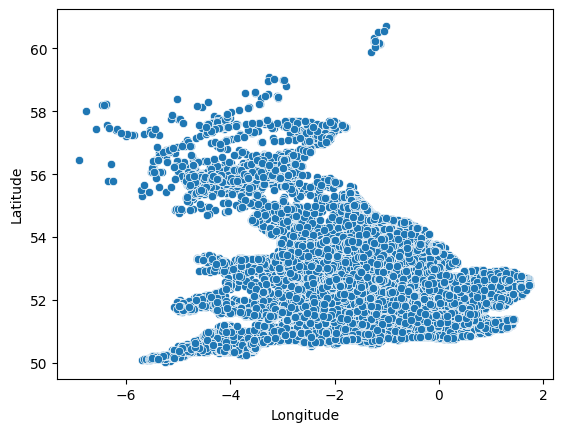

In [149]:
sns.scatterplot(x= df['Longitude'], y=df['Latitude'])

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [143]:
inertia = []
k_range = range(1,11)

for k in k_range:
 kmeans = KMeans(n_clusters=k ,init = 'k-means++', max_iter=300,
                  n_init=10,random_state=23)


 kmeans.fit(pca_features)
 inertia.append(kmeans.inertia_)

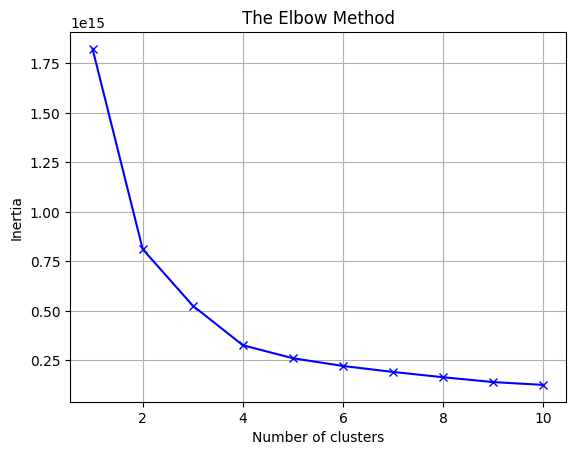

In [144]:
plt.plot(k_range,inertia,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.grid(True)
plt.show()


In [145]:
kmeans = KMeans(n_clusters=4 ,init = 'k-means++', max_iter=300, n_init=10,random_state=23)

kmeans.fit(pca_features)

KMeans(n_clusters=4, n_init=10, random_state=23)

In [146]:
cluster_labels= kmeans.predict(pca_features)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [147]:
silhouette_score(pca_features, kmeans.fit_predict(pca_features))


0.5413578242916505

## Plot the data points with their predicted cluster center

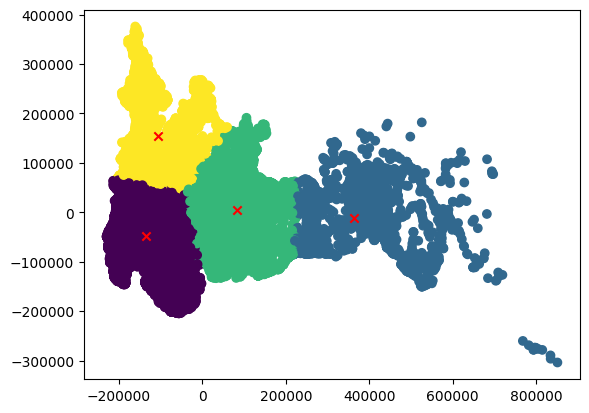

In [148]:
plt.scatter(x=pca_features[:,0],y=pca_features[:,1], c =cluster_labels )
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x', c='red')

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

I choose the feature that are related to the accidents geographicaly.

I determine the optimal number from the elbow method above which for me was 4 clusters.

I used silhouette score it checks if the sample is assigned to the clusters or not, the score made me determine that I assigned the right clusters.

I would apply more data cleaning to the dataset because it takes more time, I did keep some columns that are not related to the geographical accidents but fortunatley it didnt effect the results.
